# **ĐỒ ÁN THỰC HÀNH - NHẬP MÔN KHOA HỌC DỮ LIỆU** 

### Bảng thành viên nhóm 7 
|<center><div style="width:150px">MSSV</div><center>|<center><div style="width:290px">Họ và tên</div><center>|
|---------- |:-------------:|
| <center>20120041<center>  | <center>Trần Kim Bảo<center> |
| <center>20120053<center>  |   <center>Nguyễn Thành Đạt<center>   | 
| <center>20120071<center>  |<center>Nguyễn Thị Bích Hà<center> |
| <center>20120084<center>  | <center>Nguyễn Văn Hiếu<center> |
| <center>20120113<center>  | <center>Lê Nguyên Khang<center> |

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math
import copy
# from pandas.testing import assert_frame_equal # to compare two dataframes
# YOUR CODE HERE (OPTION) 
# Nếu cần các thư viện khác thì bạn có thể import thêm tại đây

## A. Khám phá và tiền xử lý dữ liệu


### Đọc dữ liệu từ file

In [2]:
df=pd.read_csv("COVID-19 Survey Student Responses.csv")

# Câu hỏi: Có phải những người mắc vấn đề sức khỏe trong quá trình đóng cửa xã hội, thường là những đối tượng có max hoặc min trong 1 thuộc tính hay tương quan với thuộc tính nào đó hay không?

**Ý nghĩa khi trả lời câu hỏi:**    
- Tìm ra nguyên nhân khác gây ra các vấn đề về sức khỏe cho sinh viên ngoài trừ việc mắc covid từ đó củng cố các thói quen sinh hoạt và hạn chế mắc phải vấn đề về sức khỏe.

**Nguồn cảm hứng đặt câu hỏi:**
- Xuất từ việc muốn bảo vệ sức khỏe - thứ không thể mua được bằng tiền.
- Để có thể hiểu thêm về các ngưỡng mà các tác nhân có thể gây hại cho sức khỏe chúng ta.

**Hướng thực hiện:**
- Trược quan làm rỏ các thuộc tính có ảnh hưởng đến 'Health issue during lockdown'.
- Xây dựng mô hình học máy từ các hành vi hay kết quả của hành vi và dự đoán có xảy ra vấn đề về sức khỏe hay không.

## - Tương quan 2 thuộc tính 'Health issue during lockdown' và 'Time utilized'

**Xem xét thuộc tính 'Health issue during lockdown' và 'Time utilized'**

In [3]:
df['Health issue during lockdown'].value_counts()

NO     1021
YES     161
Name: Health issue during lockdown, dtype: int64

In [4]:
df['Time utilized'].value_counts()

NO     608
YES    574
Name: Time utilized, dtype: int64

**Xem xét thuộc tính 'Health issue during lockdown' biết 'Time utilized' là YES**

In [5]:
TU_Y1 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'YES'].shape[0]
TU_Y2 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'NO'].shape[0]
TU_Y1, TU_Y2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7368\2253813917.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TU_Y1 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'YES'].shape[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7368\2253813917.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TU_Y2 = df[df['Time utilized'] == 'YES'][df['Health issue during lockdown'] == 'NO'].shape[0]


(59, 515)

**Xem xét thuộc tính 'Time utilized' biết 'Health issue during lockdown' là YES**

In [6]:
H_Y1 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'YES'].shape[0]
H_Y2 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'NO'].shape[0]
H_Y1, H_Y2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7368\2461240161.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H_Y1 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'YES'].shape[0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_7368\2461240161.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  H_Y2 = df[df['Health issue during lockdown'] == 'YES'][df['Time utilized'] == 'NO'].shape[0]


(59, 102)

**Trực quan.**

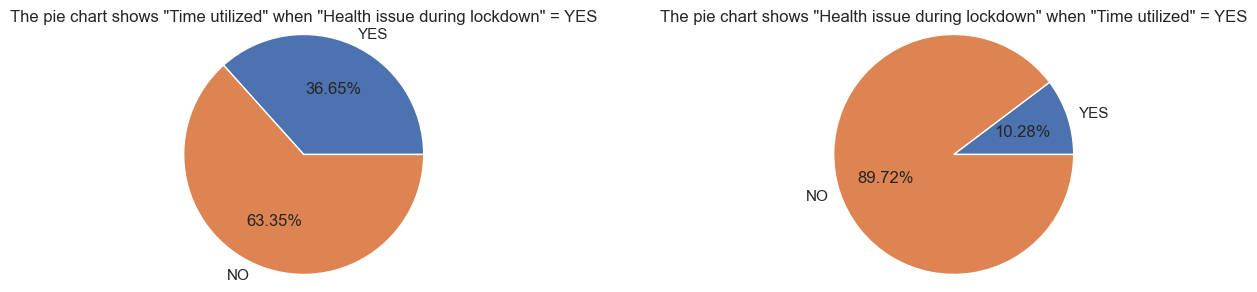

In [7]:
labels = ['YES', 'NO'] 
fracs1 = [H_Y1, H_Y2]
fracs2 = [TU_Y1, TU_Y2]

fig = plt.figure(figsize =(13, 5))
ax1 = fig.add_axes([0, 0, .5, .5], aspect = 1)
ax1.pie(fracs1, labels = labels, radius = 1.2, autopct='%1.2f%%')
ax1.set_title('The pie chart shows "Time utilized" when "Health issue during lockdown" = YES')

ax2 = fig.add_axes([.5, .0, .5, .5], aspect = 1)
ax2.pie(fracs2, labels = labels, radius = 1.2, autopct='%1.2f%%')
ax2.set_title('The pie chart shows "Health issue during lockdown" when "Time utilized" = YES')
plt.show()


        Nhận xét
- Biểu đồ thứ nhất cho thấy khi đã có vấn đề sức khỏe thì hơn 63% trong số họ đã sử dụng thời gian một cách không hợp lý.
- Biểu đồ thứ hai cho thấy rằng khi đã sử dụng thời gian một cách hợp lý thì việc có vấn đề sức khỏe hiếm có thể xảy ra (khoảng 10%).

# - Xét thuộc tính 'Number of meals per day'
- Dựa vào 'Health issue during lockdown' là No để có dữ liệu nhiều hơn, rõ ràng hơn trong việc trực quan.

**Số lượng người ăn x buổi một ngày**

In [8]:
sum_pp = df['Number of meals per day'].value_counts()
sum_pp = sum_pp.sort_index()
sum_pp

1     41
2    287
3    610
4    229
5      8
6      2
7      4
8      1
Name: Number of meals per day, dtype: int64

**Số lượng người ăn x bữa một ngày và không có vấn đề sức khỏe**

In [9]:
sum_pp_N = df[df['Health issue during lockdown'] == 'NO']['Number of meals per day'].value_counts()
sum_pp_N = sum_pp_N.sort_index()
sum_pp_N

1     32
2    235
3    534
4    206
5      7
6      2
7      4
8      1
Name: Number of meals per day, dtype: int64

**Tính tỉ lệ giữa số người ăn x bữa một ngày mà không có vấn đề sức khỏe với số người ăn x bữa một ngày**

In [10]:
ratio = df[df['Health issue during lockdown'] == 'NO']['Number of meals per day'].value_counts()/ df['Number of meals per day'].value_counts()
ratio = ratio.sort_index()
ratio

1    0.780488
2    0.818815
3    0.875410
4    0.899563
5    0.875000
6    1.000000
7    1.000000
8    1.000000
Name: Number of meals per day, dtype: float64

**Trực quan.**

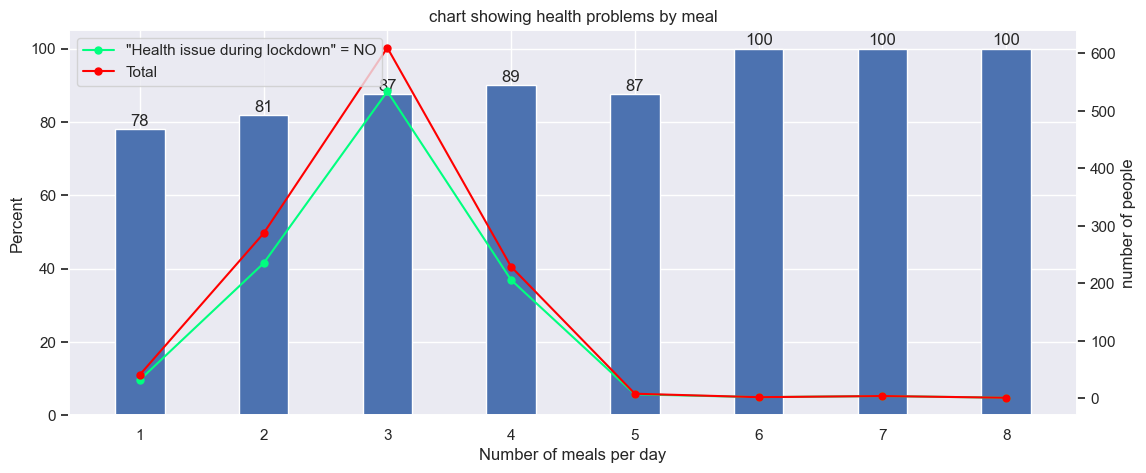

In [11]:
fig, ax1 = plt.subplots(figsize = (13, 5))

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = ratio[x]*100

yy1 = sum_pp.values
yy2 = sum_pp_N.values

ax2 = ax1.twinx()
plot = ax1.bar(x, y, width = 0.4)
for value in plot:
    height = value.get_height()
    ax1.text(value.get_x() + value.get_width()/2., 1.002*height,'%d' % int(height), ha='center', va='bottom')
    
ax2.plot(x, yy2, label = '"Health issue during lockdown" = NO', marker='o', markersize=5, linestyle='-',c = 'springgreen')
ax2.plot(x, yy1, label = 'Total', marker='o', markersize=5, linestyle='-',c = 'red')

ax1.set_ylabel('Percent')
ax1.set_xlabel("Number of meals per day")
ax2.set_ylabel('number of people')
ax2.legend(loc="upper left")
ax2.set_title('chart showing health problems by meal')
plt.grid(False)
plt.show()

      Nhận xét:
- Các cột tăng dần lên chứng tỏ việc chia nhiều buổi ăn nhỏ trong ngày sẽ giúp cơ thể hấp thu chất dinh dưỡng tốt hơn từ đó hạn chế việc gặp phải các vấn đề về sức khỏe. 
- Đa số học sinh đúng 3 bữa một ngày.
- Việc ăn từ 6 bữa trở lên thường dành cho các vận động viên, khi này các vấn đề về sức khỏe có thể gặp phải gần như bằng 0.
- Phần trăm người không gặp vấn đề sức khi ăn 1 buổi một ngày là thấp nhất - min (78%) hay khi ăn một buổi một ngày khả năng cao sẽ xảy ra các vấn đề về sức khỏe. 

-> Vậy vấn đề về sức khỏe xả ra nhiều nhất rơi vào min và không gặp các vấn đề sức khỏe nhất cũng rơi vào max của thuộc tính 'Number of meals per day'.

# - Xét thuộc tính 'Time spent on sleep'
        Chia dữ liệu thành 2 phần:
- Dữ liệu có 'Time spent on sleep' trong khoảng (6,9), là dữ liệu có thời gian ngủ hợp lý.
- Dữ liệu có 'Time spent on sleep'< 6 hoặc > 9, là dữ liệu có thời gian ngủ không hợp lý.
 

**Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian ngủ <= 6 hoặc >=9**

**Tính tỉ lệ số người ngủ x(h) không có vấn đề sức khỏe trên số người ngủ x(h)**

**Tính trung bình cộng tập tỉ lệ trên**

In [12]:
filter1 = df['Time spent on sleep'] <= 6
filter2 = df['Time spent on sleep'] >= 9

tmp = df.where( filter2 | filter1) # Lọc các dữ liệu thỏa điều kiện

#Tính tỉ lệ số người ngủ x(h) không có vấn đề sức khỏe trên số người ngủ x(h)
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on sleep'].value_counts()/ tmp['Time spent on sleep'].value_counts()
bad = np.mean(z.values) # Trung bình cộng tập tỉ lệ trên.
bad

0.877407196763318

**Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian ngủ 6< và <9**

**Tính tỉ lệ số người ngủ x(h) không có vấn đề sức khỏe trên số người ngủ x(h)**

**Tính trung bình cộng tập tỉ lệ trên**

In [13]:
filter1 = df['Time spent on sleep'] > 6
filter2 = df['Time spent on sleep'] < 9

tmp = df.where( filter2 & filter1)
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on sleep'].value_counts()/ tmp['Time spent on sleep'].value_counts()
good = np.mean(z.values)
good

0.9641376201923078

**Trực quan.**

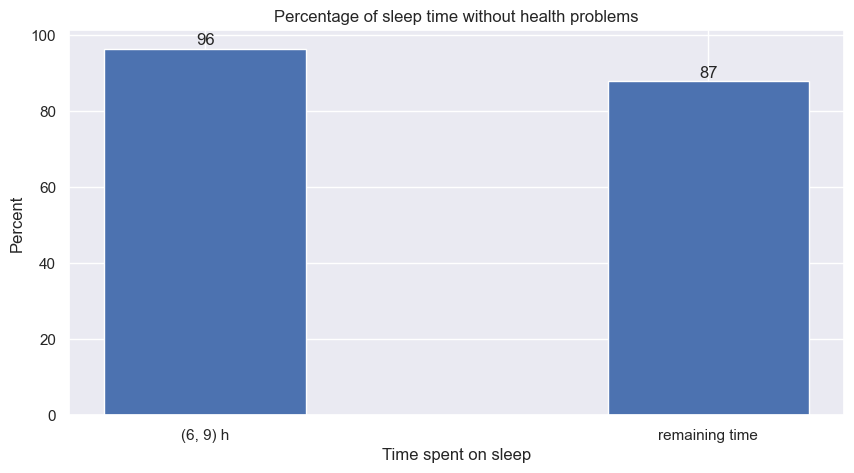

In [14]:
fig = plt.figure(figsize = (10, 5))
x = ['(6, 9) h', 'remaining time']
y = [good*100, bad*100]
plot = plt.bar(x, y, width = 0.4)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.xlabel("Time spent on sleep")
# plt.set_xticks(y)
plt.ylabel("Percent")
plt.title("Percentage of sleep time without health problems")
plt.show()

        Nhận xét:
- Nhìn chung các sinh viên bên trong dữ liệu đều có thời gian ngủ từ 4 tiếng trở lên nên cũng không quá nhiều vấn đề sức khỏe được xảy ra hay phần trăm không có vấn đề về sức khỏe cao.
- Khoảng thời gian ngủ được cho là tốt( khoảng (6, 9)) thì có phần trăm không xảy ra các vấn đề về sức khỏe cao (96%) hơn là khi ngủ ngoài khoảng thời gian này. 

# - Xét thuộc tính 'Time spent on fitness'
        chia dữ liệu thành 2 phần

- Dữ liệu có 'Time spent on fitness' = 0, là dữ liệu không tập thể dục.
- Dữ liệu có 'Time spent on fitness' > 0 là dữ liệu có tập thể dục.

**Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian tập thể dục = 0**

**Tính tỉ lệ số người không tập thể dục không có vấn đề sức khỏe trên số người không tập thể dục**

**Tính trung bình cộng tập tỉ lệ trên**

In [15]:
filter = df['Time spent on fitness'] == 0
tmp = df.where( filter)
# Tính tỉ lệ số người không tập thể dục không có vấn đề sức khỏe trên số người không tập thể dục
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on fitness'].value_counts()/ tmp['Time spent on fitness'].value_counts()
bad = np.mean(z.values) # Trung bình của tập tỉ lệ.
bad

0.8281622911694511

**Ta lọc dữ liệu chọn nhóm dữ liệu có thời gian tập thể dục > 0**

**Tính tỉ lệ số người có tập thể dục không có vấn đề sức khỏe trên số người có tập thể dục**

**Tính trung bình cộng tập tỉ lệ trên**

In [16]:
filter = df['Time spent on fitness'] > 0
tmp = df.where( filter)
z = tmp[tmp['Health issue during lockdown'] == 'NO']['Time spent on fitness'].value_counts()/ tmp['Time spent on fitness'].value_counts()
good = np.mean(z.values)
good

0.9147125704484195

**Trực quan.**

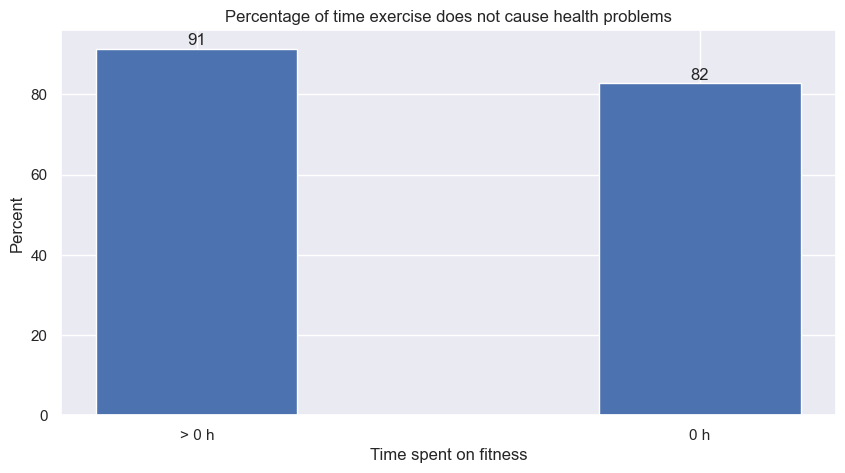

In [17]:
fig = plt.figure(figsize = (10, 5))
x = ['> 0 h', '0 h']
y = [good*100, bad*100]
plot = plt.bar(x, y, width = 0.4)

for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.xlabel("Time spent on fitness")
# plt.set_xticks(y)
plt.ylabel("Percent")
plt.title("Percentage of time exercise does not cause health problems")
plt.show()

        Nhận xét:
- Dữ liệu cho thấy việc có tập thể dục cho tỉ lệ phần trăm không có vấn đề sức khỏe cap hơn 10% so với những người không tập thể dục.

# - Xét thuộc tính 'Change in your weight'.

**Xem xét thuộc tính 'Change in your weight'**

In [18]:
df['Change in your weight'].value_counts()

Remain Constant    535
Increased          438
Decreased          209
Name: Change in your weight, dtype: int64

In [19]:
df[df['Health issue during lockdown'] == 'YES']['Change in your weight'].value_counts()

Increased          59
Remain Constant    52
Decreased          50
Name: Change in your weight, dtype: int64

**Tính tỉ lệ khi 'Health issue during lockdown' = 'NO'**

In [20]:
percent1 = df[df['Health issue during lockdown'] == 'NO']['Change in your weight'].value_counts()/df['Change in your weight'].value_counts()
percent1 = percent1.sort_index()
percent1

Decreased          0.760766
Increased          0.865297
Remain Constant    0.902804
Name: Change in your weight, dtype: float64

**Tính tỉ lệ khi 'Health issue during lockdown' = 'YES'**

In [21]:
percent2 = df[df['Health issue during lockdown'] == 'YES']['Change in your weight'].value_counts()/df['Change in your weight'].value_counts()
percent2 = percent2.sort_index()
percent2

Decreased          0.239234
Increased          0.134703
Remain Constant    0.097196
Name: Change in your weight, dtype: float64

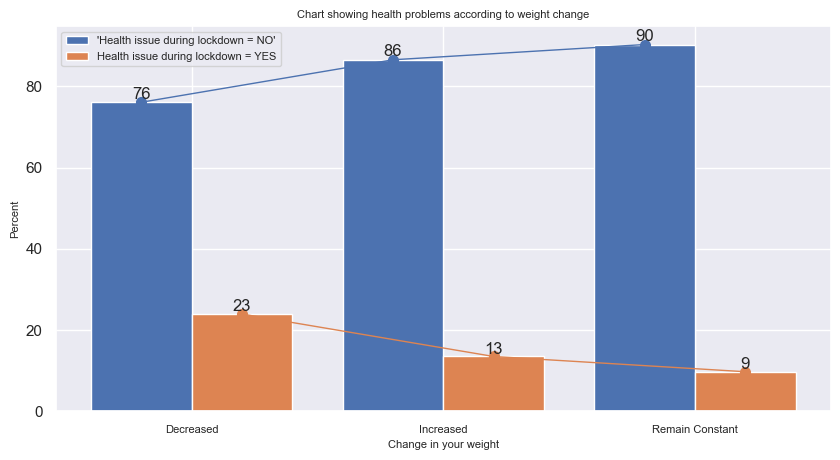

In [22]:
x = percent1.keys()
y1 = percent1.values*100
y2 = percent2.values*100
index = np.arange(1, len(x) + 1)
width = 0.4
plt.figure(figsize=(10, 5))
plot = plt.bar(index, y1, width)
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')

plot1 = plt.bar(index + width, y2, width)
for value in plot1:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,1.002*height,'%d' % int(height), ha='center', va='bottom')
    
plt.xticks(index + width/2, x, fontsize = 8)
plt.legend(["'Health issue during lockdown = NO'", "Health issue during lockdown = YES"], fontsize = 8)
plt.plot(index, y1, marker='o', markersize=7, linestyle='-', linewidth=1)
plt.plot(index + width, y2, marker='o', markersize=7, linestyle='-', linewidth=1)
plt.xlabel("Change in your weight", fontsize = 8)
plt.ylabel("Percent", fontsize = 8)
plt.title("Chart showing health problems according to weight change", fontsize = 8)
# plt.legend(loc="upper left")

plt.grid(True)

        Nhận xét:
- Cột xanh cho ta thấy phần trăm không có vấn đề sức khỏe cao nhất ở nhóm người không thay đổi cân nặng. Việc có biến đổi cân nặng tăng khả năng gây ra các vấn đề về sức khỏe cụ thể là việc giảm cần sẽ dễ gây ra các vấn đề về sức khỏe hơn (cột xanh của Decreased thấp nhất).
- Cột cam thể hiện hoàn toàn ngược lại. Khi gặp các vấn đề về sức khỏe, cột không đổi cân nặng thấp nhất , cột giảm cân là cao nhất.

        Có vẻ như việc tăng cân chưa chắc đã đáng lo, đáng lo ngại là việc giảm cân !!!

# Mô hình

**Chọn dữ liệu đặc trưng (features)**

In [23]:
feature_cols = ['Time spent on sleep', 'Number of meals per day', 'Change in your weight', 'Time utilized']
X = df[feature_cols] # Features
X = X.copy()
y = df['Health issue during lockdown'] # Target variable

In [24]:
X

,Time spent on sleep,Number of meals per day,Change in your weight,Time utilized
0,7.0,4,Increased,YES
1,10.0,3,Decreased,YES
2,6.0,3,Remain Constant,NO
3,6.0,3,Decreased,NO
4,8.0,4,Remain Constant,NO
...,...,...,...,...
1177,8.0,3,Decreased,YES
1178,9.0,4,Remain Constant,YES
1179,8.0,4,Decreased,NO
1180,8.0,4,Remain Constant,YES


**Chuẩn hóa dữ liệu dạng numeric.**

In [25]:
X['Time utilized'] = pd.get_dummies(X[ 'Time utilized'],drop_first=True)
tmp_weight = {'Increased': 1, 'Decreased': 2, 'Remain Constant': 3 } 
X['Change in your weight'] = X['Change in your weight'].map(tmp_weight)
X

,Time spent on sleep,Number of meals per day,Change in your weight,Time utilized
0,7.0,4,1,1
1,10.0,3,2,1
2,6.0,3,3,0
3,6.0,3,2,0
4,8.0,4,3,0
...,...,...,...,...
1177,8.0,3,2,1
1178,9.0,4,3,1
1179,8.0,4,2,0
1180,8.0,4,3,1


**Spliting the dataset**
- Để tránh việc overfitting trong quá trình học ta chia tập dữ liệu thành 2 phần 70% dùng để train và 30% dùng để test (XX, YY -> X_train, X_test, y_train, y_test) 

In [26]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Training machine learning model**

In [27]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier()
Dtree = Dtree.fit(X_train,y_train)

#Predict 
y_pred = Dtree.predict(X_test)


**Đánh giá hiệu suất model với tập test**

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8507042253521127
